# Multilayer Perceptron in Theano


### Contents

1. [Loading and preprocessing data](#data)
2. **Multilayer Perceptron** trained using different optimization methods
    * [Minibatch Stochastic Gradient Descent (SGD)](#minibatch_sgd)
    * [SGD with momentum](#momentum_sgd)
    * [SGD with Nesterov's method](#nesterov_sgd)
3. [Visualizing weights of 1st layer](#viz)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import theano
import theano.tensor as T

%run ../../src/fetch_mnist.py
%run ../../src/theano/mlp.py
%run ../../src/theano/plotting_utils.py

### The model 

The model uses regularization with $l_1$ and $l_2$ penalty, and is trained with gradient descent.

<a id='data'></a>

## Training on MNIST 

In [2]:
X_train, X_test, y_train, y_test = preprocessed_mnist(random_state=0)

plotter = Plotter(X_test, y_test)

/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


<a id='minibatch_sgd'></a>

## MLP with stochastic minibatch gradient descent

We use architecture with one hidden layer that has 50 neurons. ReLU is used as activation.

In [3]:
mlp = MultilayerPerceptron(
  n_iter=500,
  hidden_sizes=[50],
  batch_size=500,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.1,
  initialization_type='xavier')

%time mlp.fit(X_train, y_train)

CPU times: user 8.69 s, sys: 132 ms, total: 8.82 s
Wall time: 6.13 s


Final loss: 0.2403
Final loss, smoothed: 0.2476


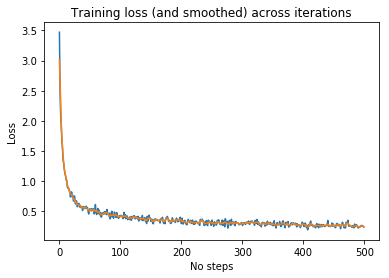

accuracy: 0.9426
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1381
          1       0.96      0.98      0.97      1575
          2       0.94      0.93      0.94      1398
          3       0.94      0.92      0.93      1428
          4       0.93      0.94      0.93      1365
          5       0.94      0.92      0.93      1263
          6       0.95      0.97      0.96      1375
          7       0.96      0.95      0.95      1458
          8       0.93      0.91      0.92      1365
          9       0.92      0.93      0.92      1392

avg / total       0.94      0.94      0.94     14000



In [4]:
plotter.plot_loss_and_accuracy(mlp)

<a id='momentum_sgd'></a>

## MLP with SGD and momentum

Note learning rate is 2x lower 

In [5]:
sgd_momentum_mlp = MultilayerPerceptron(
  n_iter=500,
  hidden_sizes=[50],
  batch_size=500,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.05,
  momentum={
    'method': 'momentum',
    'decay': 0.9})

%time sgd_momentum_mlp.fit(X_train, y_train)

CPU times: user 8.83 s, sys: 124 ms, total: 8.96 s
Wall time: 4.96 s


Final loss: 0.2146
Final loss, smoothed: 0.1985


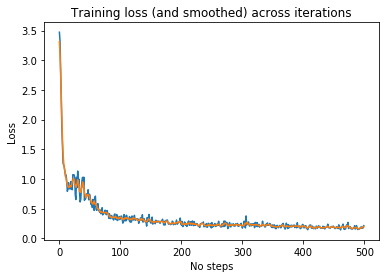

accuracy: 0.9600
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1381
          1       0.97      0.98      0.98      1575
          2       0.96      0.95      0.96      1398
          3       0.96      0.95      0.95      1428
          4       0.96      0.96      0.96      1365
          5       0.96      0.94      0.95      1263
          6       0.96      0.98      0.97      1375
          7       0.96      0.97      0.97      1458
          8       0.93      0.95      0.94      1365
          9       0.96      0.94      0.95      1392

avg / total       0.96      0.96      0.96     14000



In [6]:
plotter.plot_loss_and_accuracy(sgd_momentum_mlp)

<a id='nesterov_sgd'></a>

## MLP with SGD and Nesterov's accelerated gradient method 

In [7]:
sgd_nag_mlp = MultilayerPerceptron(
  n_iter=500,
  hidden_sizes=[50],
  batch_size=500,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.05,
  momentum={
    'method': 'nesterov',
    'decay': 0.9})

%time sgd_nag_mlp.fit(X_train, y_train)

CPU times: user 8.77 s, sys: 92 ms, total: 8.86 s
Wall time: 4.89 s


Final loss: 0.1782
Final loss, smoothed: 0.1724


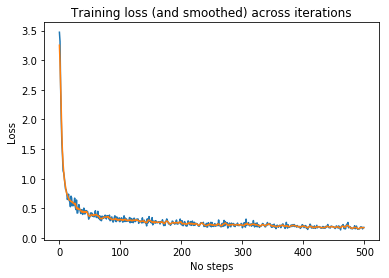

accuracy: 0.9606
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1381
          1       0.97      0.99      0.98      1575
          2       0.96      0.95      0.96      1398
          3       0.96      0.95      0.96      1428
          4       0.96      0.95      0.95      1365
          5       0.97      0.95      0.96      1263
          6       0.96      0.98      0.97      1375
          7       0.97      0.97      0.97      1458
          8       0.95      0.95      0.95      1365
          9       0.94      0.95      0.94      1392

avg / total       0.96      0.96      0.96     14000



In [8]:
plotter.plot_loss_and_accuracy(sgd_nag_mlp)

<a id='viz'></a>

## Visualizing weights

We'll show weights for NAG method's hidden layer since it seems to perform best, and the weights seem to make most sense.

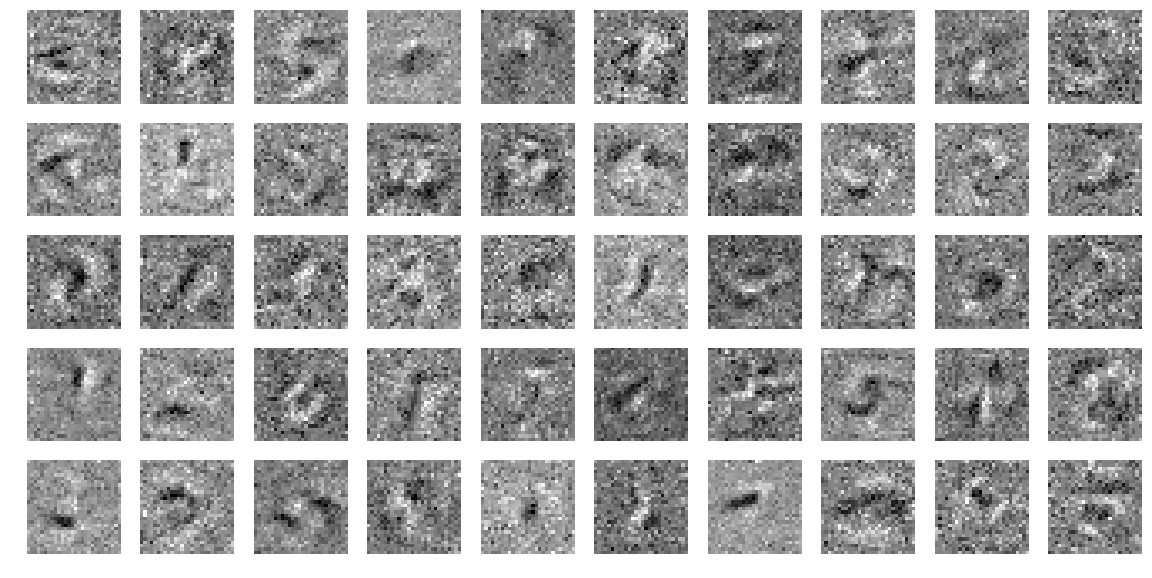

In [9]:
img_weights = sgd_nag_mlp.weights[0].get_value().reshape(28, 28, 50)


f, axes = plt.subplots(5, 10, figsize=(20, 10))

for i in range(50):
  ax = axes[i % 5, i // 5]
  ax.imshow(img_weights[:, :, i], cmap='gray')
  ax.axis('off') 
  
plt.show()

## Comparing weights

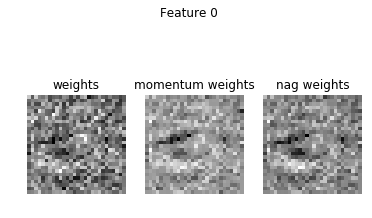

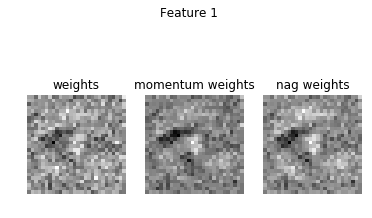

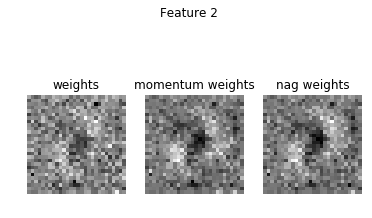

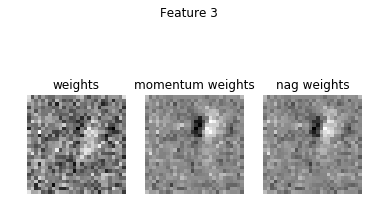

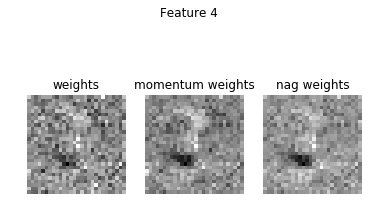

In [11]:
for i in range(5):
  digit_weights = mlp.weights[0].get_value().T[i, :].reshape(28, 28)
  momentum_digit_weights = sgd_momentum_mlp.weights[0].get_value().T[i, :].reshape(28, 28)
  nesterov_digit_weights = sgd_nag_mlp.weights[0].get_value().T[i, :].reshape(28, 28)
  f, ((ax1, ax2, ax3)) = plt.subplots(1, 3)
  f.suptitle('Feature {}'.format(i)) 
  
  
  ax1.imshow(digit_weights , cmap='gray')
  ax1.set_title('weights')
  ax1.axis('off') 
  
  ax2.imshow(momentum_digit_weights, cmap='gray')
  ax2.set_title('momentum weights')
  ax2.axis('off') 
   
  ax3.imshow(nesterov_digit_weights, cmap='gray')
  ax3.set_title('nag weights')
  ax3.axis('off') 
  plt.show()